In [2]:
import pprint
import requests

# source: https://meteostats.ch/?parameter=Precipitation&period=Year&display=Relative&reference-period=1991-2020&code=SWISS

headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.9,fr;q=0.8,be;q=0.7',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'DNT': '1',
    'Origin': 'https://meteostats.ch',
    'Pragma': 'no-cache',
    'Referer': 'https://meteostats.ch/',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Chromium";v="127", "Not)A;Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
}

response = requests.get('https://service.meteostats.ch/api/DataSeries/SWISS/Precipitation/Aggregated', headers=headers)

response.text

'{"locationCode":"SWISS","parameter":"Precipitation","quality":"Aggregated","values":[{"year":1864,"annualValue":null,"winter":null,"spring":null,"summer":null,"fall":null,"monthlyValues":[null,null,null,null,null,null,null,null,null,null,null,null]},{"year":1865,"annualValue":null,"winter":null,"spring":null,"summer":null,"fall":null,"monthlyValues":[null,null,null,null,null,null,null,null,null,null,null,null]},{"year":1866,"annualValue":null,"winter":null,"spring":null,"summer":null,"fall":null,"monthlyValues":[null,null,null,null,null,null,null,null,null,null,null,null]},{"year":1867,"annualValue":null,"winter":null,"spring":null,"summer":null,"fall":null,"monthlyValues":[null,null,null,null,null,null,null,null,null,null,null,null]},{"year":1868,"annualValue":null,"winter":null,"spring":null,"summer":null,"fall":null,"monthlyValues":[null,null,null,null,null,null,null,null,null,null,null,null]},{"year":1869,"annualValue":null,"winter":null,"spring":null,"summer":null,"fall":null,"mo

In [3]:
import json

json_string = response.text.strip("'")

# Parse the JSON string
data = json.loads(json_string)

print(f"Location Code: {data['locationCode']}")
print(f"Parameter: {data['parameter']}")
print(f"Quality: {data['quality']}")

first_year = data['values'][0]
print(f"First year: {first_year['year']}")

data['values']

Location Code: SWISS
Parameter: Precipitation
Quality: Aggregated
First year: 1864


[{'year': 1864,
  'annualValue': None,
  'winter': None,
  'spring': None,
  'summer': None,
  'fall': None,
  'monthlyValues': [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None]},
 {'year': 1865,
  'annualValue': None,
  'winter': None,
  'spring': None,
  'summer': None,
  'fall': None,
  'monthlyValues': [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None]},
 {'year': 1866,
  'annualValue': None,
  'winter': None,
  'spring': None,
  'summer': None,
  'fall': None,
  'monthlyValues': [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None]},
 {'year': 1867,
  'annualValue': None,
  'winter': None,
  'spring': None,
  'summer': None,
  'fall': None,
  'monthlyValues': [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None]},
 {'year': 1868,
  'annualValue': None,
  'winter': None,

In [4]:
import pandas as pd

values = data['values']

years = []
months = []
precipitations = []

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for entry in values:
    year = entry['year']
    monthly_values = entry['monthlyValues']
    
    for month, value in zip(month_names, monthly_values):
        if value is not None:
            years.append(year)
            months.append(month)
            precipitations.append(value)

df = pd.DataFrame({
    'year': years,
    'month': months,
    'precipitation': precipitations
})

df[df['year'] > 1990][:10]

year month  precipitation
1195  1991   Jan           61.5
1196  1991   Feb           31.6
1197  1991   Mar           89.9
1198  1991   Apr           55.4
1199  1991   May           83.3
1200  1991   Jun          175.7
1201  1991   Jul          127.6
1202  1991   Aug           21.6
1203  1991   Sep          143.2
1204  1991   Oct           73.8

In [7]:
monthly_mean = df.groupby('month')['precipitation'].mean().reset_index()
monthly_mean['date'] = pd.to_datetime('2000-' + monthly_mean['month'] + '-01', format='%Y-%b-%d')
monthly_mean_sorted = monthly_mean.sort_values('date')
monthly_mean_sorted
# monthly_mean_sorted.to_csv("../data/clean/rainiest_months.csv", index=False)

month  precipitation       date
4    Jan      80.166917 2000-01-01
3    Feb      71.416541 2000-02-01
7    Mar      80.306767 2000-03-01
0    Apr      89.510526 2000-04-01
8    May     110.885714 2000-05-01
6    Jun     126.347368 2000-06-01
5    Jul     129.990299 2000-07-01
1    Aug     134.676692 2000-08-01
11   Sep     107.890299 2000-09-01
10   Oct      97.927068 2000-10-01
9    Nov      94.186466 2000-11-01
2    Dec      91.198496 2000-12-01

In [8]:
import numpy as np
import matplotlib.pyplot as plt

monthly_norms = df.groupby('month')['precipitation'].agg(['mean', 'std']).reset_index()
monthly_norms.columns = ['month', 'mean_precipitation', 'std_precipitation']
df = df.merge(monthly_norms, on='month')

def is_outlier(row, norms, std_threshold=2):
    month_norm = norms[norms['month'] == row['month']].iloc[0]
    return abs(row['precipitation'] - month_norm['mean_precipitation']) > std_threshold * month_norm['std_precipitation']

df['is_outlier'] = df.apply(is_outlier, axis=1, norms=monthly_norms)

df.head(10)

year month  precipitation  decade  mean_precipitation  std_precipitation  \
0  1882   Sep          241.0    1880          107.890299          45.974744   
1  1882   Oct          177.5    1880           97.927068          48.166465   
2  1882   Nov          138.2    1880           94.186466          50.463887   
3  1882   Dec          129.5    1880           91.198496          44.639850   
4  1883   Jan           44.8    1880           80.166917          39.653795   
5  1883   Feb           29.3    1880           71.416541          40.598437   
6  1883   Mar           44.8    1880           80.306767          37.962574   
7  1883   Apr           47.9    1880           89.510526          35.031759   
8  1883   May           93.9    1880          110.885714          35.730375   
9  1883   Jun          157.4    1880          126.347368          39.010982   

   is_outlier  
0        True  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False

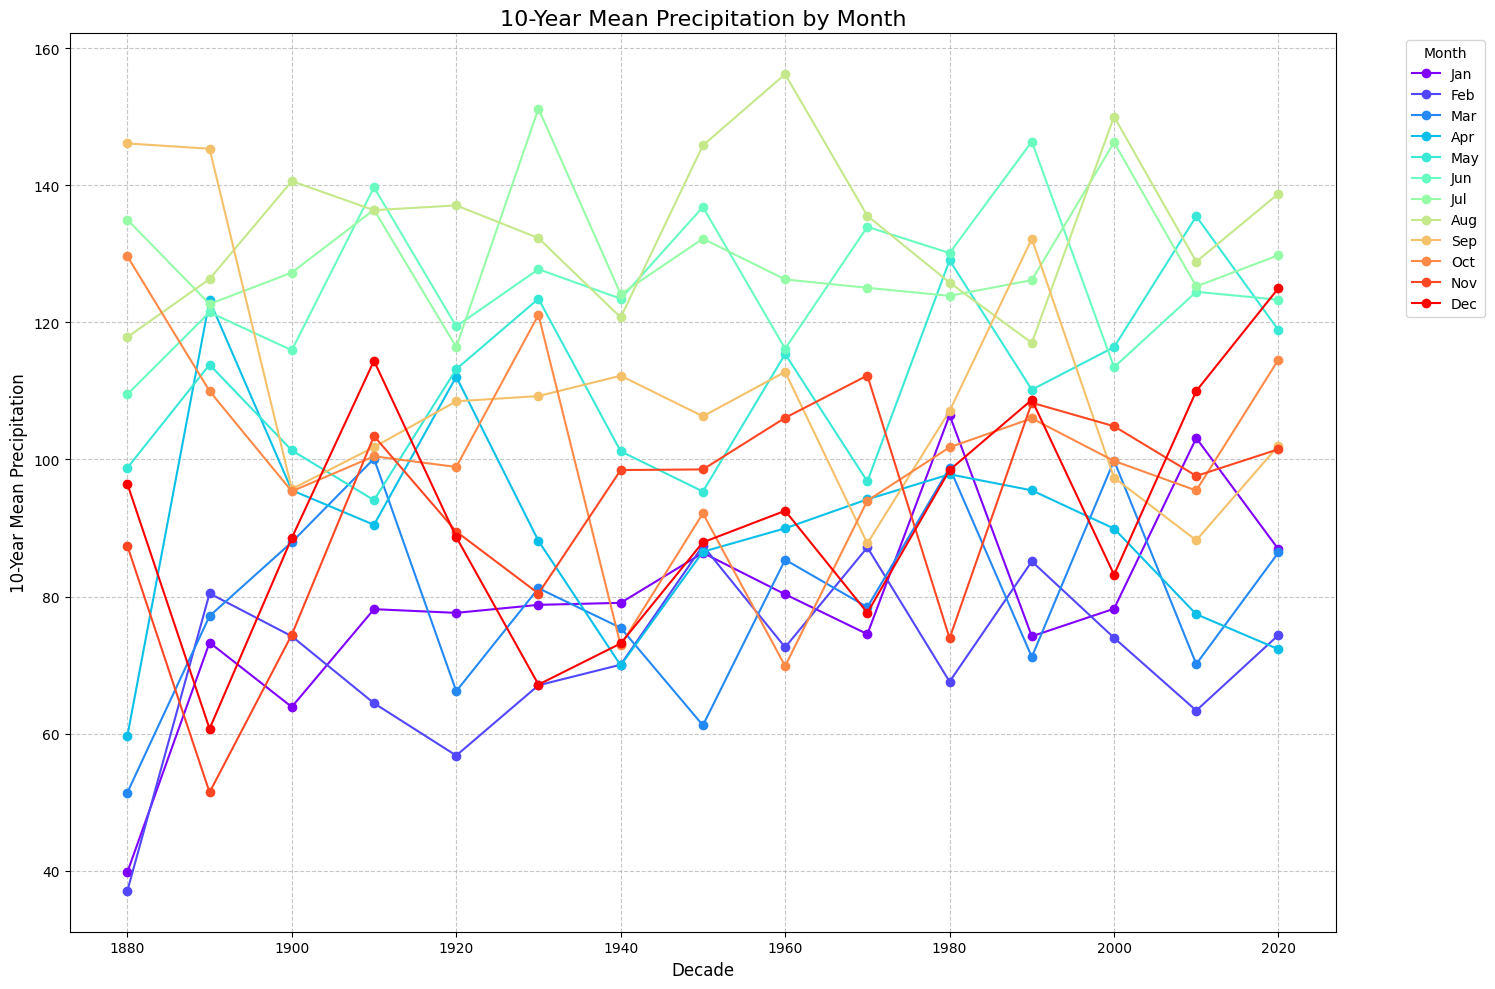

month      Apr      Aug      Dec        Feb     Jan      Jul         Jun  \
decade                                                                     
1880     59.66  117.840   96.460  37.080000   39.80  134.980  109.500000   
1890    123.20  126.325   60.725  80.466667   73.30  122.675  121.466667   
1900     95.51  140.600   88.550  74.220000   63.91  127.260  115.940000   
1910     90.47  136.360  114.400  64.450000   78.17  136.430  139.700000   
1920    112.07  137.060   88.690  56.820000   77.63  116.400  119.420000   
1930     88.12  132.290   67.170  67.070000   78.80  151.180  127.750000   
1940     69.98  120.720   73.170  70.070000   79.09  124.110  123.450000   
1950     86.55  145.820   87.920  87.430000   86.38  132.210  136.830000   
1960     89.96  156.200   92.520  72.610000   80.34  126.260  116.160000   
1970     94.19  135.540   77.640  87.180000   74.53  125.040  133.940000   
1980     97.84  125.800   98.460  67.600000  106.47  123.870  130.110000   
1990     95.50  117.000  108.710  85.140000   74.21  126.160  146.360000   
2000     89.92  150.000   83.200  73.990000   78.23  146.250  113.460000   
2010     77.43  128.850  109.990  63.380000  103.12  125.240  124.460000   
2020     72.32  138.775  125.000  74.400000   86.90  129.800  123.300000   

month          Mar         May     Nov      Oct      Sep  
decade                                                    
1880     51.420000   98.780000   87.42  129.640  146.100  
1890     77.166667  113.833333   51.45  109.975  145.325  
1900     87.940000  101.330000   74.44   95.360   95.690  
1910    100.120000   94.070000  103.42  100.470  101.810  
1920     66.200000  113.180000   89.49   98.910  108.490  
1930     81.220000  123.440000   80.45  121.090  109.250  
1940     75.450000  101.190000   98.46   72.890  112.220  
1950     61.230000   95.330000   98.55   92.150  106.300  
1960     85.380000  115.380000  106.08   69.870  112.780  
1970     78.460000   96.800000  112.25   94.000   87.760  
1980     98.800000  129.050000   73.92  101.780  107.080  
1990     71.200000  110.180000  108.28  106.000  132.190  
2000     99.840000  116.390000  104.85   99.790   97.350  
2010     70.160000  135.470000   97.60   95.480   88.210  
2020     86.440000  118.860000  101.50  114.575  102.025

In [9]:
df['decade'] = (df['year'] // 10) * 10  # Group years into decades
decade_month_avg = df.groupby(['decade', 'month'])['precipitation'].mean().unstack()

# Create the line graph
plt.figure(figsize=(15, 10))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = plt.cm.rainbow(np.linspace(0, 1, 12))

for i, month in enumerate(months):
    if month in decade_month_avg.columns:
        plt.plot(decade_month_avg.index, decade_month_avg[month], 
                 label=month, color=colors[i], marker='o')

plt.xlabel('Decade', fontsize=12)
plt.ylabel('10-Year Mean Precipitation', fontsize=12)
plt.title('10-Year Mean Precipitation by Month', fontsize=16)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
decade_month_avg

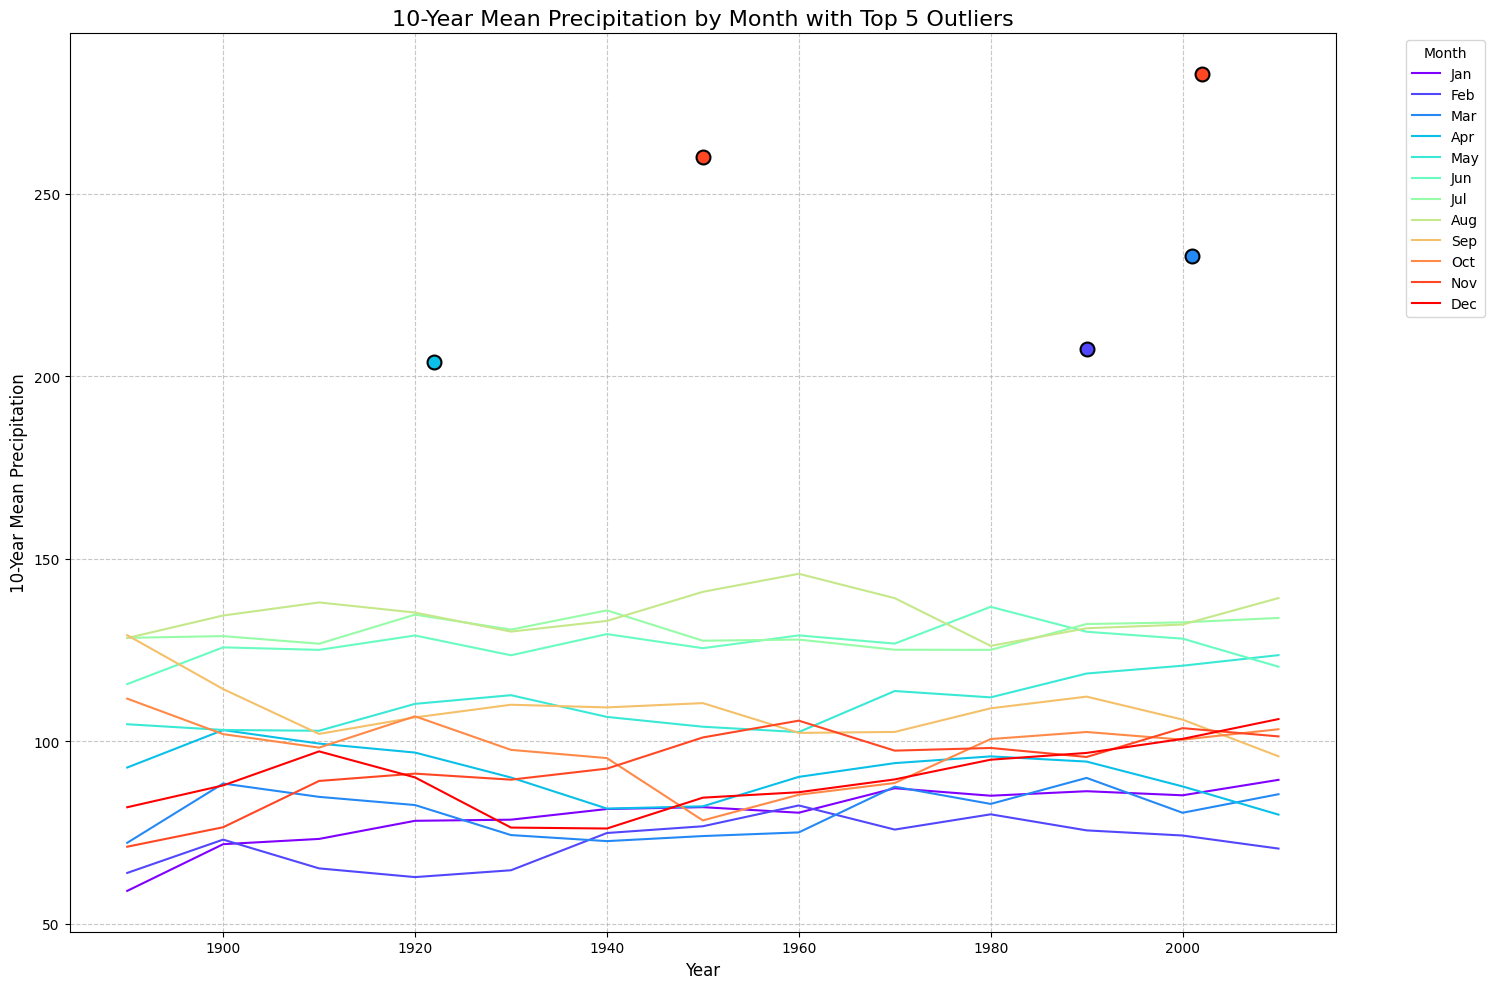

In [10]:
def calculate_z_score(group):
    return np.abs((group - group.mean()) / group.std())

z_scores = df.groupby('month')['precipitation'].transform(calculate_z_score)
df['z_score'] = z_scores
outliers = df.nlargest(5, 'z_score')
outliers.to_csv("../data/outliers.csv")
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

plt.figure(figsize=(15, 10))

colors = plt.cm.rainbow(np.linspace(0, 1, 12))

for i, month in enumerate(months):
    if month in decade_month_avg.columns:
        x = decade_month_avg.index.astype(int)
        y = decade_month_avg[month].values
        
        # Create smoothed line
        if len(y) > 3:  # Only smooth if we have enough data points
            y_smooth = moving_average(y, 3)  # 3-point moving average
            x_smooth = x[1:-1]  # Adjust x to match the smoothed y
        else:
            y_smooth = y
            x_smooth = x
        
        plt.plot(x_smooth, y_smooth, label=month, color=colors[i])
        
        # Plot outliers for this month
        month_outliers = outliers[outliers['month'] == month]
        plt.scatter(month_outliers['year'], month_outliers['precipitation'], 
                    color=colors[i], s=100, edgecolor='black', linewidth=1.5, zorder=5)

plt.xlabel('Year', fontsize=12)
plt.ylabel('10-Year Mean Precipitation', fontsize=12)
plt.title('10-Year Mean Precipitation by Month with Top 5 Outliers', fontsize=16)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
df['date'] = df['year'].astype(str) + '-' + df['month']
df.to_csv("../data/rain_per_month.csv")

In [42]:
dm = decade_month_avg.reset_index()
dm.columns =['decade', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dm = dm.astype(int)
dm = dm.set_index("decade")
dm

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
decade                                                            
1880     59  117   96   37   39  134  109   51   98   87  129  146
1890    123  126   60   80   73  122  121   77  113   51  109  145
1900     95  140   88   74   63  127  115   87  101   74   95   95
1910     90  136  114   64   78  136  139  100   94  103  100  101
1920    112  137   88   56   77  116  119   66  113   89   98  108
1930     88  132   67   67   78  151  127   81  123   80  121  109
1940     69  120   73   70   79  124  123   75  101   98   72  112
1950     86  145   87   87   86  132  136   61   95   98   92  106
1960     89  156   92   72   80  126  116   85  115  106   69  112
1970     94  135   77   87   74  125  133   78   96  112   94   87
1980     97  125   98   67  106  123  130   98  129   73  101  107
1990     95  117  108   85   74  126  146   71  110  108  106  132
2000     89  150   83   73   78  146  113   99  116  104   99   97
2010     77  128  109   63  103  125  124   70  135   97   95   88
2020     72  138  125   74   86  129  123   86  118  101  114  102

In [76]:
new_df = dm.stack()
new_df = new_df.reset_index()

new_df['date'] = new_df['decade'].astype(str) + '-' + new_df['level_1']
new_df = new_df.rename(columns={0: 'precipitation'})
new_df = new_df[['date', 'precipitation']]
new_df['datetime'] = pd.to_datetime(new_df['date'], format='%Y-%b')
new_df = new_df.sort_values('datetime')
#new_df.to_csv("../data/clean/moving_rain_mean.csv", index=False)

date  precipitation   datetime
0    1880-Jan             59 1880-01-01
1    1880-Feb            117 1880-02-01
2    1880-Mar             96 1880-03-01
3    1880-Apr             37 1880-04-01
4    1880-May             39 1880-05-01
..        ...            ...        ...
175  2020-Aug             86 2020-08-01
176  2020-Sep            118 2020-09-01
177  2020-Oct            101 2020-10-01
178  2020-Nov            114 2020-11-01
179  2020-Dec            102 2020-12-01

[180 rows x 3 columns]

In [71]:
#Most dangerous month according to outliers
top_30 = df.sort_values('precipitation', ascending=False).head(30)
month_counts = top_30['month'].value_counts()
month_counts_df = month_counts.reset_index()
month_counts_df.columns = ['Month', 'Count']
#month_counts_df.to_csv('../data/clean/month_counts_rain_extremes.csv', index=False)

In [ ]:
# month means, sorted